# Introduction
This is my entry for the Kaggle [Titanic competition](https://www.kaggle.com/c/titanic).  The challenge is to identify which people survived using machine learning.  Evaluation is scored using the accuracy of predicted survival (`1` for survived and `0` for deceased.

# Importing Data
Let's begin by importing the train and test data from `train.csv` and `test.csv` respectively.

In [1]:
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Data Review
Before we begin modifying the data, it's a good idea to get to know it by observing the columns, typical values, and hunting down any problematic (or redundant) columns early.  We will do this with simple printing and summary statistics.

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see here that there are 891 observations present of 12 features.  However, a number of columns have missing values.  The `Age` column has only 714 valid values, the `Cabin` only 204 (!), and `Embarked` has 889.  Let's also check the test set as it may differ.

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Firstly we obviously have one less column as `Survived` is what we are predicting!  In the test set, we have 418 observations.  `Age` is impacted with only 332 valid entries, `Fare` has a single missing value, and `Cabin`, as before, is plagued with only 91 valid entries.

Before we continue, let's have a quick look at some summary statistics to spot if there's anything *very* off (like somebody being 800 years old instead of 80).

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


All looks reasonable!  Let's now begin cleaning the data and engineering some new features.

# Data Cleaning and Feature Engineering
Let's begin by dropping columns that are bound to be unnecessary or do not have sufficient data to confidently impute.

In [6]:
# `PassengerId` is highly unlikely to have any impact upon survival rate.
train.drop('PassengerId', axis=1, inplace=True)
# It's unlikely that `Ticket` numbers impacted the survival rate.
train.drop('Ticket', axis=1, inplace=True)

# Repeating for the test data, but keeping `PassengerID` as we need that!
test.drop('Ticket', axis=1, inplace=True)

With those features removed, let's now focus on imputing what's missing in both datasets.

* `Age` can be imputed in both datasets with median or mean. Both values are *similar* in this data.
* `Embarked` in the training data can use the most common point of entry.
* `Fare` in the test data has only a single value, so we can just use the median or mean.

In [7]:
# Handle `Age` in both datasets.
train.Age.fillna(train.Age.median(), inplace=True)
test.Age.fillna(test.Age.median(), inplace=True)

# Handle `Embarked` in the training data.
train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)

# Handle `Fare` in the test data.
test.Fare.fillna(test.Fare.median(), inplace=True)

Let's verify that all null values have been removed by inspecting the `info()` of each again.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


## Family Size / Coding
The `SibSp` column and `Parch` can be added together to calculate the family size on board for a given member.  We can then drop the other two columns and rely on this singular feature.  Apparently some kids traveled with nannies that weren't counted as family, but this should hopefully be of minimal impact.

In [10]:
# Compute for test. Add 1 for self.
train['FamilySize'] = (train.SibSp + train.Parch) + 1
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Compute for test.
test['FamilySize'] = (test.SibSp + test.Parch) + 1
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

Let's have a look at the distribution for family size.

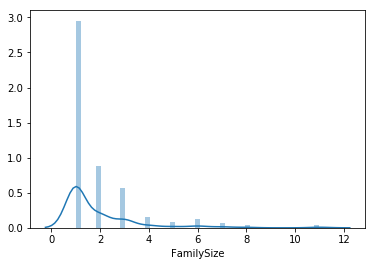

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(train.FamilySize)
plt.show()

This graph shows that there are a small number of families that are large, but most sit around the 2-4 region.  Let's map our existing `FamilySize` column into a coded entry based on the number of family members.  Here, I consider:

* `1` - Single
* `2` - Couple
* `3 - 4` - Medium
* `5 - *` - Large

In [12]:
# Replace `FamilySize` with coded version.
train['FamilySize'] = pd.cut(train.FamilySize, bins=[0, 2, 3, 5, 100], labels=['Single', 'Couple', 'Medium', 'Large'])

# Do the same for test.
test['FamilySize'] = pd.cut(test.FamilySize, bins=[0, 2, 3, 5, 100], labels=['Single', 'Couple', 'Medium', 'Large'])

## Cabin Coding
The `Cabin` is tricky.  There's a *lot* of missing data but it could also be useful.  After some reading of other solutions, it is my understanding that the first character is the *desk*.  Therefore, we can strip the first character out and replace the missing values with an appropriate entry (without imputing as that wouldn't be feasible).

Let's try this and then visualize the relation to survival.

In [13]:
train['Cabin'] = pd.Series([x[0] if not pd.isnull(x) else 'X' for x in train.Cabin])

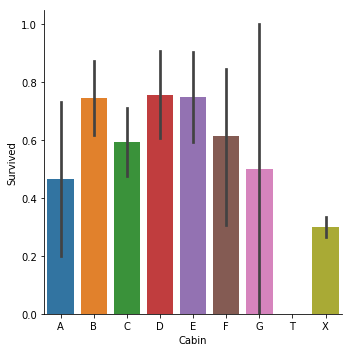

In [14]:
sns.catplot(x='Cabin', y='Survived', data=train, kind='bar', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'])

We can see that not having a cabin assigned (`X` in the above graph) is quite bad for survival rate.  Additionally, there is *one* entry with cabin `T`, and nobody in the test data has `T`, so I'm going to be naughty and move him to `X`.  Let's also repeat this process for the test data before continuing.

In [15]:
train['Cabin'].replace('T', 'X', inplace=True)
test['Cabin'] = pd.Series([x[0] if not pd.isnull(x) else 'X' for x in test.Cabin])

## Fare Coding
Given that the fares appear to be all over the place and not clearly separated (i.e. 10 pounds, 20 pounds, rather than 10.457), let's cut them up into segments.  We could do this with percentiles using `pd.pcut`, but I'm going to try bucketing them based on the actual ticket prices advertised for the Titanic.  A discussion of the prices can be found [here](https://www.quora.com/What-were-the-ticket-prices-to-board-the-Titanic).  *I am assuming here that the prices are listed in pounds.*

* Third Class range from `3` pounds to `8` pounds.
* Second class was `12` pounds.
* First class (berth) was `30` pounds.
* First class (parlor)was `870` pounds.

Given that the maximum `Fare` for both datasets is just over `512`, let's merge the two first class entries together.  I'll also remove the original `Fare` column.

In [16]:
# Cut the `Fare` into groups roughly matching the above.
# -0.001 is used as floats cannot be matched directly to 0 due to imprecision.
# 1000 is used as an arbitrary max to encompass all. This could also be max(Fare) + a bit.
# Boundaries are set at 12 for third class, even though *technically* 8 pounds is the max.
train['FareCoded'] = pd.cut(train.Fare, bins=[-0.001, 12.0, 30.0, 1000.0], labels=['Third', 'Second', 'First'])
train.drop('Fare', axis=1, inplace=True)

# Repeat for test dataset.
test['FareCoded'] = pd.cut(test.Fare, bins=[-0.001, 12.0, 30.0, 1000.0], labels=['Third', 'Second', 'First'])
test.drop('Fare', axis=1, inplace=True)

## Age Coding
I couldn't find any solid information about age groups, so I'm just going to code them using age groups similar to those from [here](https://www.statcan.gc.ca/eng/concepts/definitions/age2).

* `0 - 4` - Baby (newborn, infant, toddler).
* `5 - 12` - Child (pre-teen).
* `13 - 17` - Teenager.
* `18 - 64` - Adult (given that 18 is considered adulthood in most places, including the UK).
* `65 - *` - Senior/elderly.

Again, I'll drop the original `Age` column after this coding.

In [17]:
# Cut the `Age` into groups as above.
# A max age of 1000 is used to to capture everything; it's value doesn't really matter.
train['AgeCoded'] = pd.cut(train.Age, bins=[0, 5, 13, 18, 65, 1000], labels=['Baby', 'Child', 'Teen', 'Adult', 'Senior'])
train.drop('Age', axis=1, inplace=True)

# Repeat for test dataset.
test['AgeCoded'] = pd.cut(test.Age, bins=[0, 5, 13, 18, 65, 1000], labels=['Baby', 'Child', 'Teen', 'Adult', 'Senior'])
test.drop('Age', axis=1, inplace=True)

## Name Coding
Let's extract the titles and see what kind of distribution there is.

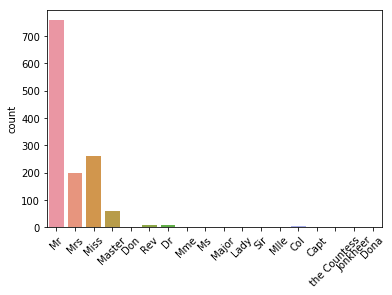

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


In [19]:
all_names = pd.concat([train.Name, test.Name]) # Something special shows up only in test data.
all_titles = pd.Series([x.split(',')[1].split('.')[0].strip() for x in all_names])
g = sns.countplot(all_titles)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

print(all_titles.unique())

Given the number of rare titles, we can group them.

In [20]:
def code_name(names):
    # Extract titles.
    titles = pd.Series([x.split(',')[1].split('.')[0].strip() for x in names])
    # Group rare entries.
    titles = titles.replace(['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    # Group non-married women (possibly, but we have limited information).
    titles = titles.replace(['Mme', 'Ms', 'Mlle'], 'Miss')
    return titles

# Make `Title` column from coded titles.
train['Title'] = code_name(train.Name)
test['Title'] = code_name(test.Name)

# Drop original `Name` columns.
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

## Visual EDA
Before we do any more modification to our dataset, let's have a look at how different variables we have created link to survival rate with some simple visual EDA.

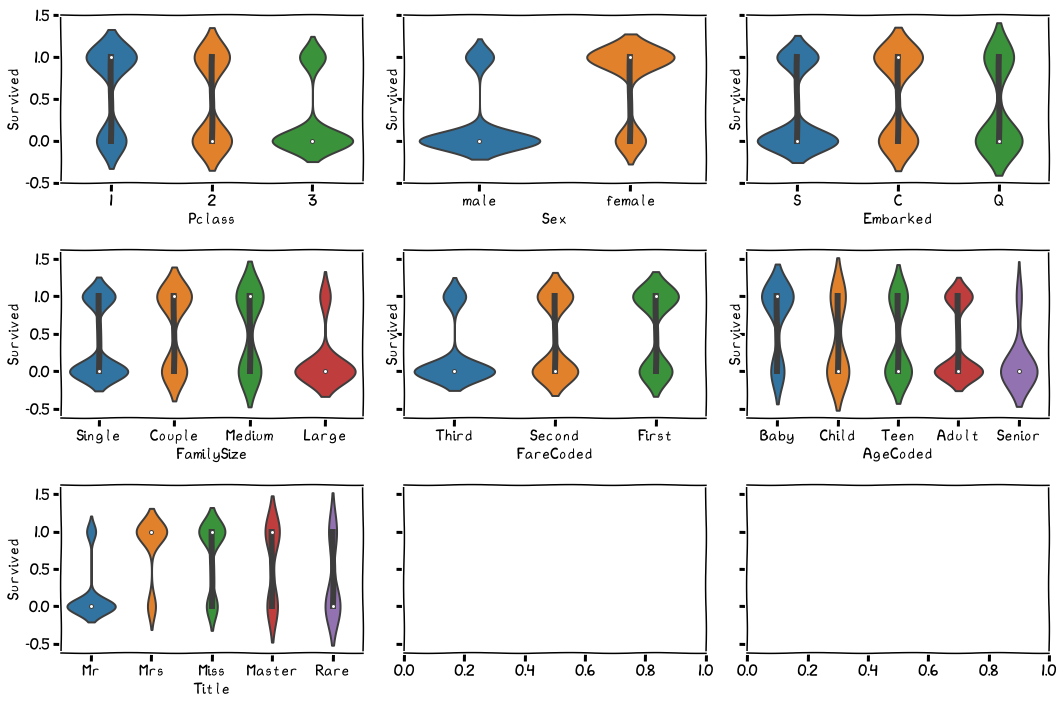

In [21]:
with plt.xkcd(scale=0.4):
    fig, ax = plt.subplots(3, 3, sharey='row', figsize=(15,10))
    sns.violinplot(train.Pclass, train.Survived, ax=ax[0,0])
    sns.violinplot(train.Sex, train.Survived, ax=ax[0,1])
    sns.violinplot(train.Embarked, train.Survived, ax=ax[0,2])
    sns.violinplot(train.FamilySize, train.Survived, ax=ax[1,0])
    sns.violinplot(train.FareCoded, train.Survived, ax=ax[1,1])
    sns.violinplot(train.AgeCoded, train.Survived, ax=ax[1,2])
    sns.violinplot(train.Title, train.Survived, ax=ax[2,0])
    fig.tight_layout()
    plt.show()

A quick glance at the plots shows that they all contribute in some way to survival rate.  Some **very** light and amusing observations are:

* `Pclass` shows that, as expected, the chance of surviving goes down as your class does.
* `Sex` shows that males are screwed and females are not!
* `Embarked` shows that it's a bad idea to start in Southampton (this probably hasn't changed even today...lol).
* `FamilySize` shows that once you hit a family of four, you're likely to have less priority.
* `FareCoded` somewhat mirrors the results of `Pclass`.  This may result in redundancy, but we'll see how performance is first.
* `AgeCoded` shows that the older you get, the less people want to save you!
* `Title` reveals the same situation as `Sex`, but provides a little more insight into titles.

*Please don't take this bit seriously, thank you.*

Now that we've had a look at the data, let's move on to preparing it for machine learning

# Prepare Data for Model
## Extract test `PassengerId`s
Before we continue, let's set aside the `PassengerId` column and drop it from the test dataset.

In [22]:
test_passenger_ids = test.PassengerId
test.drop('PassengerId', axis=1, inplace=True)

## One-Hot / Dummies / etc.
All of these categorical variables are great, but will not be useful for machine learning in their current state.  Let's one-hot encode them all using dummies.

In [23]:
# Pandas calls these dummies. Let's do it for both sets.
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# A quick look at what the dummies version looks like.
train.head()

,Survived,Pclass,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,AgeCoded_Baby,AgeCoded_Child,AgeCoded_Teen,AgeCoded_Adult,AgeCoded_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,3,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Features and Labels
Let's now prepare the `features` and `labels` that will be used to train our model.  The features are every column except `Survived`, and the labels are simply the `Survived` column.

In [24]:
features = train.drop('Survived', axis=1)
labels = train.Survived

## Scaling
~~Since all of the one-hot encoded fields are 0 or 1, they do not need to be scaled.  Let's use a `MinMaxScaler` to bring the other columns into range, though.~~

I'm going to leave data scaling for now, but it's possible to add in at a later date (don't forget to scale the test data, too!).

In [25]:
#from sklearn.preprocessing import MinMaxScaler
#features = MinMaxScaler().fit_transform(features)
#test = MinMaxScaler().fit_transform(test)

## PCA
Let's now use PCA to identify how many features we should keep.

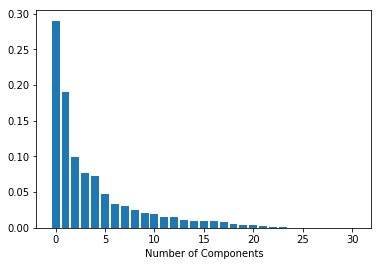

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features)
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.show()

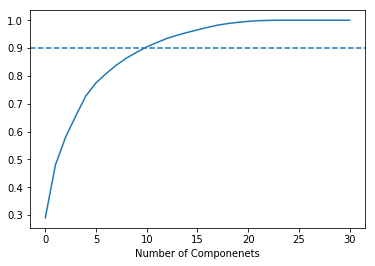

In [27]:
import numpy as np
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_exp_var)
plt.axhline(y=0.9, linestyle='--') # 0.9 is arbitrary
plt.xlabel('Number of Componenets')
plt.show()

Let's perform the scaling on the datasets now.  Remember that we're now working with `features` and not `train`, but `test` remains used.

In [28]:
n_components = 16 # based on the graphs above
pca = PCA(n_components)

# Fit and apply to features dataset.
train_pca = pca.fit_transform(features)

# ONLY apply the ALREADY TRAINED PCA to the test dataset.
test_pca = pca.transform(test)

# Build and Fit Model
Now let's build our model, fit the data, and optimize it!  I'm going to be using a voting classifier method with a handful of tuned models included.  Let's tune the models first.

## Helper Function

In [29]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Logistic Regression

Logistic Regression: 0.8204264870931538 / {'C': 1, 'penalty': 'l1'}


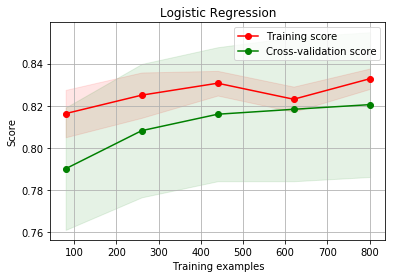

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# This is shared.
kfold = StratifiedKFold(n_splits=10)

logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}
cv_logreg = GridSearchCV(LogisticRegression(solver='liblinear'), logreg_params, cv=kfold, scoring='accuracy', n_jobs=-1, iid=True)
cv_logreg.fit(train_pca, labels)
print('Logistic Regression: {} / {}'.format(cv_logreg.best_score_, cv_logreg.best_params_))

plot_learning_curve(cv_logreg.best_estimator_, 'Logistic Regression', train_pca, labels, cv=kfold)
plt.show()

## SVC

SVC: 0.8294051627384961 / {'C': 1, 'gamma': 0.1}


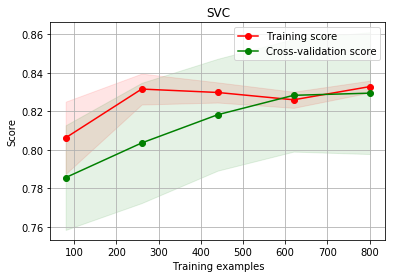

In [31]:
from sklearn.svm import SVC

svc_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': np.arange(0, 1, step=0.1)
}
cv_svc = GridSearchCV(SVC(kernel='rbf', probability=True), svc_params, cv=kfold, scoring='accuracy', n_jobs=-1, iid=True)
cv_svc.fit(train_pca, labels)
print('SVC: {} / {}'.format(cv_svc.best_score_, cv_svc.best_params_))

plot_learning_curve(cv_svc.best_estimator_, 'SVC', train_pca, labels, cv=kfold)
plt.show()

## Random Forest

Random Forest: 0.8372615039281706 / {'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 350}


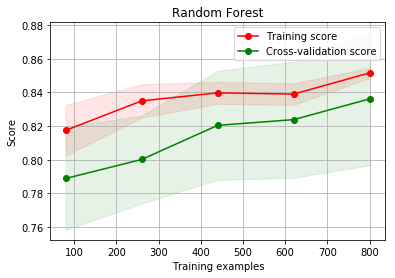

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [10, 100, 350, 500],
    'max_features': ['log2', 'auto'],
    'min_samples_leaf': [1, 2, 5, 10]
}
cv_rf = GridSearchCV(RandomForestClassifier(bootstrap=False), rf_params, cv=kfold, scoring='accuracy', n_jobs=-1, iid=True)
cv_rf.fit(train_pca, labels)
print('Random Forest: {} / {}'.format(cv_rf.best_score_, cv_rf.best_params_))

plot_learning_curve(cv_rf.best_estimator_, 'Random Forest', train_pca, labels, cv=kfold)
plt.show()

## Gradient Boosting

Gradient Boosting: 0.8395061728395061 / {'learning_rate': 0.05, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 100}


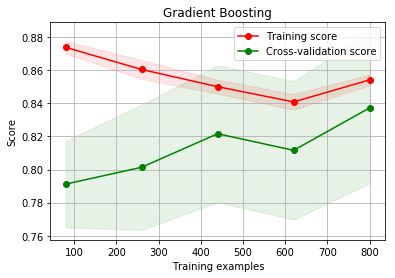

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': [10, 100, 350, 500],
    'max_features': ['log2', 'auto'],
    'min_samples_leaf': [1, 2, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
cv_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=kfold, scoring='accuracy', n_jobs=-1, iid=True)
cv_gb.fit(train_pca, labels)
print('Gradient Boosting: {} / {}'.format(cv_gb.best_score_, cv_gb.best_params_))

plot_learning_curve(cv_gb.best_estimator_, 'Gradient Boosting', train_pca, labels, cv=kfold)
plt.show()

## Voting Classifier

In [34]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('logreg', cv_logreg.best_estimator_),
    ('svc', cv_svc.best_estimator_),
    ('rf', cv_rf.best_estimator_),
    ('gb', cv_gb.best_estimator_)
], voting='soft', n_jobs=-1)

voting = voting.fit(train_pca, labels)

# Predict and Submit
Now we're ready to use our voting classifier to predict and submit the survival rates of the test data!

In [35]:
predicted_survival = voting.predict(test_pca)
print(predicted_survival)

submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': predicted_survival
})
submission.to_csv('./submissions/final.csv', index=False)

print('Done!')

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]
Done!


## Pipeline
I'll be using a simple Logistic Regression model.  It's included in a pipeline to make it easier to swap out elements and to make adding extra steps (if desired) easier.  A Random Forest classifier is commented out below as that provided similar results (but took longer).

In [36]:
from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Create the base pipeline.
# pl = Pipeline([
#     ('svm', SVC())
#     #('rf', RandomForestClassifier(random_state=42))
# ])

# # Use `GridSearchCV` to optimize the parameters.
# params = {
#     'svm__C': np.arange(1, 20, step=1),
#     'svm__gamma': np.arange(0, 1, step=0.1)
#     #'rf__n_estimators': [10, 100, 350, 500],
#     #'rf__max_features': ['log2', 'auto', 'sqrt'], # auto and sqrt are the same right now
#     #'rf__min_samples_leaf': [1, 2, 5, 10, 15]
# }
# cv = GridSearchCV(pl, params, cv=3, n_jobs=-1, scoring='accuracy')
# cv.fit(train_pca, labels)

# # Print a few important stats!
# print('Best CV Score: {}'.format(cv.best_score_))
# print('Best CV Params: {}'.format(cv.best_params_))

# Predict Labels and Submit!
Let's now predict the labels using the test data!

In [37]:
# predicted_survival = cv.best_estimator_.predict(test_pca)
# print(predicted_survival)

## Submission
Let's finish by writing out the submission to CSV.

In [38]:
# submission = pd.DataFrame({
#     'PassengerId': test_passenger_ids,
#     'Survived': predicted_survival
# })
# submission.to_csv('./submissions/final.csv', index=False)